from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import urllib

# import web driver
from selenium import webdriver
from parsel import Selector

# specifies the path to the chromedriver.exe
driver = webdriver.Chrome('/Users/shelley/documents/chrome/chromedriver')

# driver.get method() will navigate to a page given by the URL address
driver.get('https://www.linkedin.com/in/shelleylineham/')
driver.page_source

# assigning the source code for the webpage to variable sel
sel = Selector(text=driver.page_source) 

print(sel)
# terminates the application
#driver.quit()


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# import re for regular expression library
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import unidecode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# TODO: import other libraries as necessary

# Load Data

In [2]:
sl_df = pd.read_csv("ShelleyLI_CSV.csv")
print(sl_df.info())
print(sl_df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 1 columns):
Sentence    266 non-null object
dtypes: object(1)
memory usage: 2.2+ KB
None
                                            Sentence
0         Application for Acceptance to MMAI Program
1                   Queen’s Smith School of Business
2  Please find enclosed my resume for considerati...
3  MMAI program.  I am a woman that has spent my ...
4  Bachelor of Commerce from Laurentian Universit...


In [3]:
#X = df.Sentence
#print(X)

In [4]:

#sl_df.dropna(inplace=True)
list(sl_df)
sl_df.shape
sl_df.head()
sl_df.tail()

,Sentence
261,See 2 endorsements for Professional Mentoring2
262,Coaching & Mentoring
263,See 1 endorsement for Coaching & Mentoring1
264,Governance
265,See 15 endorsements for Governance15


In [11]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english'))
stop_words.add('for')
stop_words.add('see')
stop_words.add('endorsement')
stop_words.add('endorsements')
stop_words.add('addition')
stop_words.add('please')
stop_words.add('resume')
stop_words.add('individual')
stop_words.add('filled')
stop_words.add('told')
stop_words.add('spent')
stop_words.add('find')
stop_words.add('divisional')
stop_words.add('would')
stop_words.add('didnt')
stop_words.add('etc')
stop_words.add('undergraduate')
stop_words.add('last')
stop_words.add('entire')
stop_words.add('go')
stop_words.add('school')
stop_words.add('department')
stop_words.add('bachelor')
stop_words.add('divisional')
stop_words.add('role')
stop_words.add('smith')
stop_words.add('even')
stop_words.add('together')
stop_words.add('evening')
stop_words.add('enclosed')
stop_words.add('full')
stop_words.add('part')
stop_words.add('direct')
stop_words.add('basis')
stop_words.add('queen')
stop_words.add('laurentian')
stop_words.add('york')
stop_words.add('including')
stop_words.add('perfect')
stop_words.add('large')
stop_words.add('time')
stop_words.add('desktop')
stop_words.add('drove')
stop_words.add('company')
stop_words.add('take')
stop_words.add('high')
stop_words.add('coupled')
stop_words.add('many')
stop_words.add('interim')
stop_words.add('background')
stop_words.add('year')
stop_words.add('know')
stop_words.add('hands')
stop_words.add('candidate')
stop_words.add('career')
stop_words.add('add')
stop_words.add('cornerstone')
stop_words.add('earned')
stop_words.add('degree')
stop_words.add('brand')
stop_words.add('aspect')
stop_words.add('following')
stop_words.add('second')
stop_words.add('application')
stop_words.add('received')
stop_words.add('next')
stop_words.add('someone')
stop_words.add('honor')



lemmer = WordNetLemmatizer()
porter = PorterStemmer()
lancaster=LancasterStemmer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    
    #Stemming
    #x = [porter.stem(w) for w in x.split() if w not in stop_words]
    
    return ' '.join(x) 

%time sl_df['sent_clean'] = sl_df['Sentence'].apply(preprocess)
sl_df.head()
sl_df.count()

CPU times: user 58.2 ms, sys: 3.69 ms, total: 61.9 ms
Wall time: 62.2 ms


Sentence      266
sent_clean    266
dtype: int64

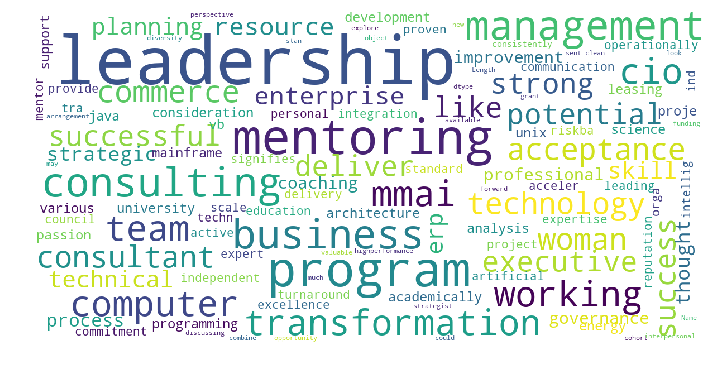

In [12]:
# https://www.datacamp.com/community/tutorials/wordcloud-python

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
#url = "https://www.linkedin.com/in/shelleylineham/"
#file = urllib.request.urlopen(url)

show_wordcloud(sl_df['sent_clean'])


In [ ]:
# terminates the application
#driver.quit()
